In [2]:
import pandas as pd
df=pd.read_csv("Sales.csv")
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [3]:
print("Dataset Shape :",df.shape)

Dataset Shape : (3114, 12)


In [4]:
print("Columns: \n",df.columns.tolist())

Columns: 
 ['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating', 'Selling Price', 'Original Price', 'Mobile', 'Discount', 'discount percentage']


In [5]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [6]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


In [7]:
#RAM options are categorical (e.g., "4 GB", "6 GB"), and products often follow popular configurations. 
# Imputing with the mode avoids introducing bias or invalid values.
df['Memory'].fillna(df['Memory'].mode()[0],inplace=True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_640\4158018307.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Memory'].fillna(df['Memory'].mode()[0],inplace=True)


In [8]:
#Similar to RAM, this is categorical. Using the most common internal storage size maintains dataset integrity.
df['Storage'].fillna(df['Storage'].mode()[0],inplace=True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_640\3589390388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Storage'].fillna(df['Storage'].mode()[0],inplace=True)


In [9]:
#Rating (144 missing) 
#Best Strategy: Fill with mean or median
#Mean is fine if distribution is normal (symmetric).
#Median is safer if distribution is skewed (many high or low ratings).
print(df['Rating'].skew())
#Skewness describes the asymmetry of a distribution (how the data is spread).

-1.2961994956067846


In [10]:
#📍 If skewness is close to 0 → use mean
#📍 If skewed (e.g., > ±1) → use median
df['Rating'].fillna(df['Rating'].median(), inplace=True)


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_640\2995000534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [11]:
print("Missing values",df.isnull().sum())

Missing values Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


In [12]:
print("\n Summary statistics:\n",df.describe())


 Summary statistics:
             Rating  Selling Price  Original Price      Discount  \
count  3114.000000    3114.000000     3114.000000   3114.000000   
mean      4.245729   26436.625562    28333.473025   1896.847463   
std       0.265894   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  
count          3114.000000  
mean              6.086788  
std              11.106776  
min            -160.320641  
25%               0.000000  
50%               0.000000  
75%               9.836388  
max              70.610305  


In [13]:
#Check for duplicates
df.duplicated().sum()

np.int64(118)

In [14]:
#Top brands by number of models
df['Brands'].value_counts()

Brands
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

In [15]:
#Average rating and price per brand
df.groupby('Brands')[['Rating', 'Selling Price']].mean()


,Rating,Selling Price
Brands,,
ASUS,4.095763,20326.915254
Apple,4.533075,81985.560724
GIONEE,3.858140,7135.093023
Google Pixel,4.506897,61391.862069
HTC,3.969091,28314.381818
IQOO,4.400000,37190.000000
Infinix,4.276821,11092.178808
LG,3.984848,19323.181818
Lenovo,3.977686,10083.842975


In [16]:
#Most discounted phones
df.sort_values(by=['discount percentage'],ascending=False).head(10)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
908,GIONEE,Pioneer P3,White,512 MB,4 GB,Yes,3.6,2350,7996,GIONEE Pioneer P3,5646,70.610305
826,GIONEE,Marathon M5 Plus,Polar Gold,3 GB,64 GB,Yes,4.1,8499,28099,GIONEE Marathon M5 Plus,19600,69.753372
306,ASUS,ROG,Black,8 GB,128 GB,Yes,4.3,26499,83999,ASUS ROG,57500,68.453196
720,Motorola,Z2 Force,Super Black,6 GB,64 GB,Yes,4.1,14999,44999,Motorola Z2 Force,30000,66.668148
2771,Nokia,8110,Black,512 MB,4 GB,Yes,3.7,3000,8400,Nokia 8110,5400,64.285714
507,LG,Wing,Aurora Gray,8 GB,128 GB,Yes,4.2,29999,80000,LG Wing,50001,62.501250
2632,LG,Wing,Illusion Sky,8 GB,128 GB,Yes,4.2,29999,80000,LG Wing,50001,62.501250
858,GIONEE,S6,Gold,3 GB,32 GB,Yes,3.8,7999,20924,GIONEE S6,12925,61.771172
1482,LG,G8X,Black,6 GB,128 GB,Yes,4.4,27990,70000,LG G8X,42010,60.014286
572,Google Pixel,Nexus 5X,Black,2 GB,16 GB,Yes,4.5,12000,29990,Google Pixel Nexus 5X,17990,59.986662


In [17]:
brand_profit=df.groupby('Brands')['Discount'].sum().sort_values(ascending=False)
brand_profit.head()

Brands
SAMSUNG     1823227
Apple       1134611
OPPO         533202
realme       471403
Motorola     454009
Name: Discount, dtype: int64

In [18]:
import numpy as np

# Convert to NumPy array
selling_prices = df['Selling Price'].to_numpy()

# Mean
mean_price = np.mean(selling_prices)
print("Mean Selling Price:", mean_price)

# Median
median_price = np.median(selling_prices)
print("Median Selling Price:", median_price)

# Standard Deviation
std_dev_price = np.std(selling_prices)
print("Standard Deviation of Selling Prices:", std_dev_price)

max_price = np.max(selling_prices)
min_price = np.min(selling_prices)
range_price = np.ptp(selling_prices)

print("Maximum Selling Price:", max_price)
print("Minimum Selling Price:", min_price)
print("Range of Selling Prices:", range_price)

Mean Selling Price: 26436.625561978162
Median Selling Price: 15000.0
Standard Deviation of Selling Prices: 30062.064537679908
Maximum Selling Price: 179900
Minimum Selling Price: 1000
Range of Selling Prices: 178900


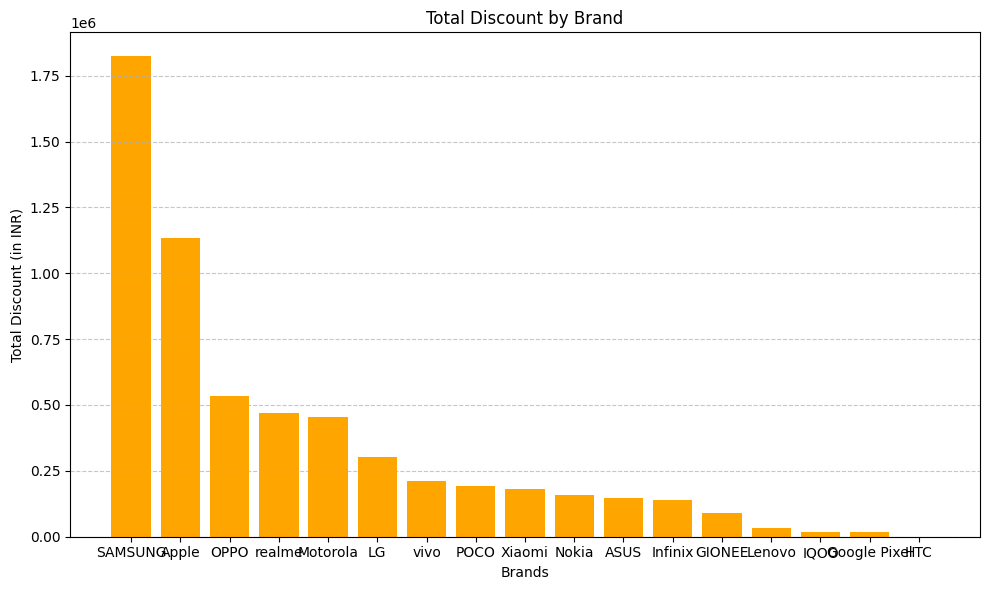

In [19]:
import matplotlib.pyplot as plt

# Group by 'Brands' and sum the 'Discount' for each brand, then sort in descending order
brand_discount = df.groupby('Brands')['Discount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))                      
plt.bar(brand_discount.index, brand_discount.values, color='orange')  
plt.title('Total Discount by Brand')              
plt.xlabel('Brands')                             
plt.ylabel('Total Discount (in INR)')            
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()                                

# Show the chart
plt.show()

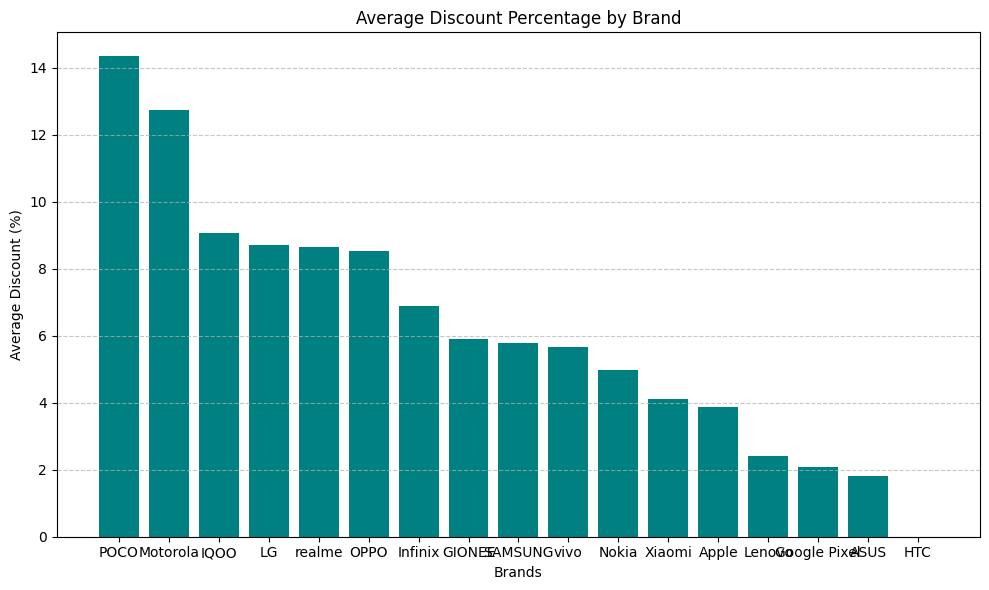

In [20]:
avg_discount_pct = df.groupby('Brands')['discount percentage'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_discount_pct.index, avg_discount_pct.values, color='teal')
plt.title('Average Discount Percentage by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Discount (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

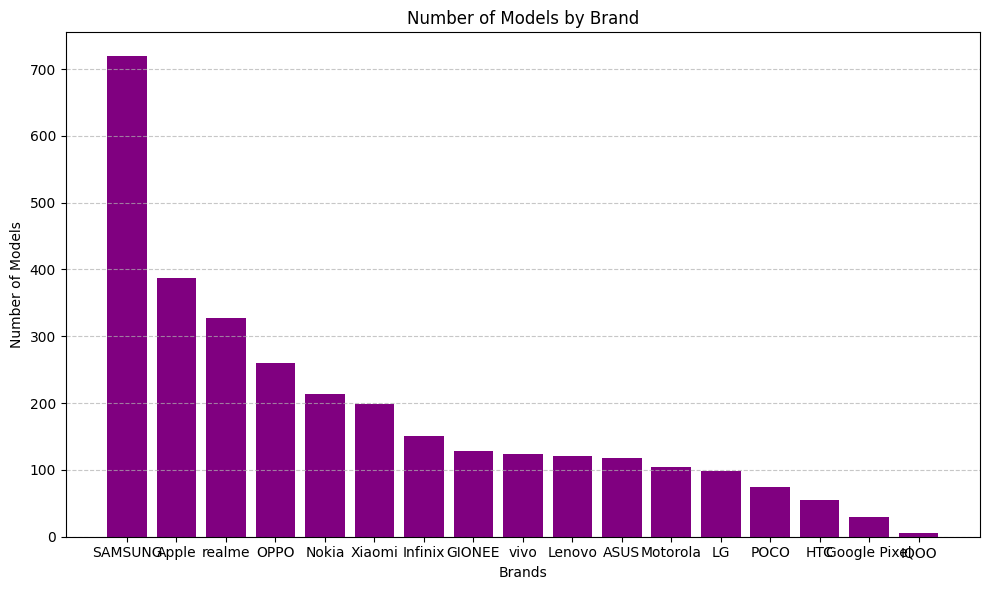

In [21]:
model_count = df['Brands'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(model_count.index, model_count.values, color='purple')  
plt.title('Number of Models by Brand')
plt.xlabel('Brands')
plt.ylabel('Number of Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()